
## FINANCIAL ECONOMETRICS
MODULE 4 | LESSON 2

---

# **TIME SERIES STATISTICAL MODELS**

|  |  |
|:---|:---|
|**Reading Time** | 60 minutes |
|**Prior Knowledge** | Regression analysis, Basic statistics  |
|**Keywords** |  First difference, Backshift operator, White noise, Random walk, Random walk with a drift, Moving average|


---

*In this lesson, first, we will proceed from the previous lesson to introduce some methods to remove trends from a non-stationary time series. After that, we are going to introduce some time series models. They are foundational time series models that will help readers understand more complicated time series models to be introduced in later lessons and modules. In particular, we will cover white noise, random walk, random walk with a drift and moving average models. We will calculate their means and variances as wells as ACF and PACF. We will also check their stationarity.*

In [ ]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [ ]:
# Download the dataset
m4_data = pd.read_csv("../M4. goog_eur_10.csv")
dxyr_data = pd.read_csv("../M4. dxy_r_data.csv")

# Convert date variable to date format
m4_data["Date2"] = pd.to_datetime(m4_data["Date"], format="%m/%d/%Y")
dxyr_data["Date2"] = pd.to_datetime(dxyr_data["Date"], format="%m/%d/%Y")

# Selecting columns
goog = m4_data.loc[:, ["Date2", "GOOGLE"]].set_index("Date2")

## **1. Remove Trend from Non-Stationary Time Series**

In the last lesson, we saw that one of the key points of time series analysis is to understand the relationship of data observations in different time points for a time series. We introduced ACF and PACF that are key metrics to understanding the relationship among the observations in a time series. We also introduced stationary time series. A stationary time series means that its mean and autocovariance are independent of absolute time location of data observations. For example, $Cov(X_t, X_s)$ must depend only on the difference $t-s$. The estimation of ACF and PACF will be accurate and stable without the worry of which section of data we choose to estimate. Hence, it is critical to obtain a stationary time series before doing modeling work.

Removing trends from a non-stationary time series is usually the first step to handling the time series data. In this section, we will go through two common methods to remove a trend: using a trend variable or differencing. We will use Google stock as an example to illustrate the process.


### **1.1 Remove Trend with a Trend Variable**

The first method to remove trend from a non-stationary time series is to model the variable with a linear trend variable. Figure 1 shows the concept of a linear trend variable, a straight line against time in the graph.


**Figure 1: A Trend Variable**

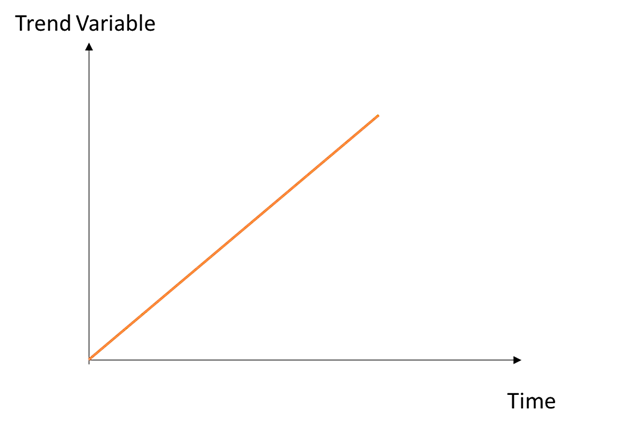


Now, we can run a simple regression model for Google stock price as follows:

$$ \text{Google stock price} = \text{intercept} + \beta \cdot \text{trend} $$

Figure 2 below shows the model result.


**Figure 2: Regression Model for Google Stock Price and Trend**


In [ ]:
# Detrend
timeTrend = np.linspace(1, len(goog.GOOGLE), len(goog.GOOGLE))
timeTrend = sm.add_constant(timeTrend)

# Fit OLS
model = sm.OLS(goog.GOOGLE, timeTrend)
fit_g = model.fit()
fit_g.summary()

Next, let’s plot the residuals from the model against time in the following graph.

**Figure 3: Residuals from Simple Regression of Google Stock Price on Trend**


In [ ]:
# Plot residuals
goog_res = fit_g.resid
goog_res.plot(linewidth=1.3, xlabel="Year", ylabel="Residuals")
plt.show()

From figure 3, we can see the residuals from the simple regression model with a trend variable does not appear to exhibit stationarity. The time series of residuals shows what resembles a "V pattern," and therefore, it does not appear that the mean is constant over time. Thus, the residuals from the regression do not form a stationary time series. 

Adding a trend variable does not seem to be enough to make Google stock price into a stationary time series.

Let’s look at the differencing method.


### **2.2 Removing Trend Using the Differencing Method**

Another popular method to remove a trend in a time series is differencing. Before going into the differencing details, let’s define some terms.


#### **2.2.1 Notations**

The first one we will introduce is first difference. First difference is defined as:

$$ \nabla x_{t} = x_{t} - x_{t-1} $$

And second difference can be written as:

$$ \nabla^{2} x_{t} = \nabla (\nabla x_t) = \nabla(x_{t}-x_{t-1}) = (x_{t}-x_{t-1}) - (x_{t-1}-x_{t-2}) $$

The next notation is backshift operator. The backshift operator is defined as:

$$ B x_{t} = x_{t-1} $$

And

$$ B^{2} x_{t} = B (B x_{t}) = B x_{t-1} = x_{t-2} $$

From above, we can write a general backshift operator as follows:

$$ B^{k} x_{t} = x_{t-k} $$

With the backshift operator, we can also write the first difference with backshift operator:

$$ \nabla x_{t} = x_{t}-x_{t-1} = x_{t}-Bx_{t} = (1-B)x_{t} $$

Then, the second difference can be defined and written as follows:

$$ \nabla ^{2} x_{t} = (1-B)^{2} x_{t} = (1-2B+B^{2}) x_{t} = x_{t} - 2 x_{t-1} + x_{t-2} $$

And the difference of order $d$ can be defined as:

$$ \nabla^{d} = (1-B)^{d} $$


#### **2.2.2. Differencing Method**

The differencing method is used to generate first difference time series. Let’s keep using Google stock price as an example. Figure 4 shows the first difference of Google stock price.


**Figure 4: First Difference of Google Stock Price**


In [ ]:
# Plot First Difference of Google Stock Price
goog.diff().plot(
    linewidth=1.3, xlabel="Year", ylabel="First difference of Google stock price"
)
plt.show()

We can see that the first difference of Google stock price fluctuates around $0$ during the whole period. However, the variation of the first difference increases as time goes on. It means that variance is dependent on time. Hence, the first differencing of Google stock price is still not enough to make it stationary. Let’s look at its ACF.


**Figure 5: ACF of First Difference of Google Stock Price**


In [ ]:
# ACF of First Difference of Google Stock Price
# (Note: [1:] as we need to skip first element since the model lost one data point)
fig, ax = plt.subplots(figsize=(12, 9))
sm.graphics.tsa.plot_acf(
    goog.diff()[1:],
    title="ACF of First Difference of Google Stock Price",
    lags=30,
    ax=ax,
)
plt.show()

From figure 5, we can see there are a few lags before lag 16 that are significant at the 95% level. We can use this piece of information for later modeling. 

We used both the trend variable and differencing methods to remove the trend for Google stock price time series. Unfortunately, neither method did a good job of converting the time series to a stationary one. In the following sections, we will learn more models to see if they would be a better model choice for Google stock price. 


## **3. White Noise**

**White noise** is a special time series model. The white noise time series is generated from a collection of uncorrelated random variables. We can define white noise time series ${W_{t}}$ as follows:

$$ {W_{t}}\sim WN(0,\sigma^{2}) $$

Its autocovariance is given by:

$$ \gamma_{_{W}}(h) = \begin{cases}
  \sigma_{2}  & \text{ for }  h=0 \\
  0  &  \text{ for } |h| \gt 0
\end{cases} $$

Since both mean and autocovariance of white noise are independent of $t$, white noise is a stationary time series.

If the white noise random variables are also independent and identical, we can denote it as follows:

$$ {W_{t}} \sim iid(0,\sigma^{2}) $$

If all the random variables are i.i.d. and normally distributed, this is a normal white noise time series and we can denote it as follows:

$$ {W_{t}} \sim iid N(0,\sigma^{2}) $$

Let’s produce one simulation of a white noise process (see figure 6).


**Figure 6: Normal White Noise Time Series Example**


In [ ]:
# Normal white noise ts example
plt.plot(np.random.normal(0, 3, 300))
plt.title("Normal White Noise with Mean=0 and Variance=9")
plt.show()

Figure 6 shows a white noise time series with mean = $0$ and variance = $9$. We can see the time series is pretty choppy, but it oscillates around $0$. 

Normal independent white noise is similar to the normal independent error terms in OLS regression. Usually, a time series can be broken down into a trend component, a seasonality component, and a residual component. If we can model the residual using a white noise model, then we will be able to model the whole time series and predict it. The random nature of the white noise makes it a good choice as a random term in the following time series models. 


## **4. Random Walk**

The next time series model we would like to talk about is the random walk time series. A random walk time series says that the current value depends only on the past value with a random component. We can write down the math definition as follows:

If $\{ X_{t} \}$ is a random walk time series and $x_0 = 0$, then $X_{t} = X_{t-1} + W_{t}$ where ${W_{t}} \sim WN(0,\sigma^{2})$

From the above definition, you can replace $X_{t_1}$ with $X_{t-2} + W_{t_1}$ and continue the same replacement process until $X$ is represented with $W_{i}$ where $i = 1, \cdots, t$ and $ X_{0}$. We call this a back substitution technique. After you do the process, you can replace the above definition with the following formula:

$$ X_{t} = \sum_{i=1}^{t} W_{i} + X_{0} = \sum_{i=1}^{t} W_{i} $$

The mean function:

$$  E(X_{t}) = E(X_{t-1} + W_{t}) = E(\sum_{i=1}^{t} W_{i} + X_{0}) = X_{0}=0 $$

From the mean function, we know it is not dependent on $t$ but on the first time $X_{0}$. In this case, it is $0$.

The autocovariance:

$$ COV(X_{t+h},X_{t}) = COV(X_{t} + W_{t+1} + W_{t+2} + \cdots + W_{t+h}, X_{t}) = Cov(X_{t},X_{t}) = t \delta^{2} $$

We can see the autocovariance is dependent on $t$. Hence, the random walk time series is not a stationary time series.


**Figure 7: Random Walk Examples**


In [ ]:
# Four random walks

# Helper function
def RandWalkPlot(seed):
    np.random.seed(seed)
    wn = np.random.normal(0, 1, 300)
    rw = np.cumsum(wn)
    plt.plot(rw)
    plt.title("Random Walk")


# 4 random walk examples
ax1 = plt.subplot(221)
RandWalkPlot(12345)  # RW example 1

ax2 = plt.subplot(222)
RandWalkPlot(54321)  # RW example 2

ax3 = plt.subplot(223)
RandWalkPlot(222)  # RW example 3

ax4 = plt.subplot(224)
RandWalkPlot(333)  # RW example 4
plt.show()

In figure 7, we simulated four random walk time series of 300 data points with the same setup: normal white noise and $X_{0}=0$. Every time we generate a time series from the same random walk model, we'll get a very different random walk time series. There is no clear common pattern. We can also see random walk is not confined in a range as a stationary time series is. 

One common random walk time series variation is **random walk with a drift**. Random walk with a drift is to add a constant term $D$ to a random walk model. We can write random walk with a drift model as follows:

If $\{ X_t \}$ is a random walk with a drift time series and $x_{0} = 0$, then $X_{t} = D + X_{t-1} + W_{t}$ where ${W_{t}} \sim WN(0,\sigma^{2})$ and $D$ is a constant

We call $D$ a drift. With the back substitution technique, we can rewrite the model as follows:

$$ X_{t} = D t + \sum_{i=1}^{t} W_{i}+X_{0} = D t +\sum_{i=1}^{t} W_{i} $$

The mean function:

$$ E(X_{t}) = D t + \sum_{i=1}^{t} E(W_{i}) = D t $$

From the mean function, we see it is dependent on t.

The autocovariance:

$$ COV(X_{t+h},X_{t}) = COV(X_{t} + W_{t+1} + W_{t+2} + \cdots + W_{t+h}, X_{t}) = Cov(X_{t},X_{t}) = t \sigma^{2} $$

As the difference of random walk and random walk with a drift is only the addition of a constant drift, their autocovariance should be the same. We can see that random walk with a drift is not a stationary time series either. Both mean and autocovariance depend on $t$. Also because of the addition of drift, the mean is increasing as time increases. Hence, random walk with a drift is a choice to model real world time series that possess a trending pattern. 


**Figure 8: Random Walk with a Positive Drift and Random Walk with a Negative Drift Examples**


In [ ]:
# RW examples with drift
np.random.seed(99999)
wnd = np.random.normal(0, 1, 500)

plt.figure(figsize=(16, 5))
ax1 = plt.subplot(121)
plt.plot(np.cumsum(wnd + 0.1))
plt.title("Random Walk With a Positive Drift")

ax2 = plt.subplot(122)
plt.plot(np.cumsum(wnd - 0.1))
plt.title("Random Walk With a Negative Drift")
plt.show()

In figure 8, we generated one random walk with a positive drift time series and one random walk with a negative drift time series. We can see the positive drift time series has a clear upward trend as expected. The negative drift time series initially goes up then slowly moves down but the pattern is very choppy. From the above graphs, random walk with a drift can be a model choice for a time series with a trending pattern.


## **5. Moving Average**

A moving average model tries to model a shock with impact in a finite time frame. If a shock in interest has an initial impact and the impact gradually fades in a finite time frame, the moving average model can be a model choice. A moving average with a shock lasting only for a total time range of $q$ can be written as MA($q$) and is defined as follows:

$$ W_{t} = W_{t} + \theta_{1} W_{t-1} + \theta_{2} W_{t-2} + \cdots + \theta_{q} W_{t-q} $$

Where $\theta_{1}, \theta_{2}, \cdots, \theta_{q}$ are parameters and $W_{t}$ is normally distributed white noise with mean = $0$ and variance $\sigma^{2}$ is $1$. There are $q$ lags in the model.

We can also write the MA($q$) model using backshift operator:

$$ X_{t} = \theta(B) W_{t} $$

Where $\theta(B)$ is the **moving average operator** as follows:

$$ \theta(B) = 1 + \theta_{1} B + \theta_{2} B^{2} + \cdots + \theta_{q} B^{q} $$

The following plots show some simulated examples for moving average models.


**Figure 9: MA(1): $\theta = 0.3$ (Top) and MA(2): $\theta = -0.7$ (Bottom)**

In [ ]:
# Moving Average examples

# Helper MA1 function
def MA1(theta):
    arparams = np.array([0.0])
    ar = np.r_[1, -arparams]
    maparams = np.array([theta])
    ma = np.r_[1, maparams]  # add zero-lag
    y = arma_generate_sample(ar, ma, nsample=300)
    return y


# MA(1): theta=0.3
plt.figure(figsize=(16, 4))
plt.plot(MA1(0.3))
plt.title("MA(1): $\\theta=0.3$")
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

# MA(1): theta=-0.7
plt.figure(figsize=(16, 4))
plt.plot(MA1(-0.7))
plt.title("MA(1): $\\theta=-0.7$")
plt.xlabel("Time")
plt.ylabel("X")
plt.show()

From figure 9, we can see the time series in the bottom plot is more volatile than the time series in the top plot. Now, let’s check the mean, autocovariance, and autocorrelation of MA(1) process.

Mean: 

$$ E(X_{t}) = E(W_{t} + \theta W_{t-1})=0 $$

Autocovariance:

$$ \gamma(h)= \begin{cases}
  (1+\theta^{2}) \sigma^{2}  & \text{ for }  h=0 \\
  \theta \sigma^{2}  &  \text{ for }  h=1 \\
  0  &  \text{ for }  h\gt 1 
\end{cases} $$

ACF:

$$ \rho(h)= \begin{cases}
  \frac{\theta}{(1+\theta^{2})}  &  \text{ for } h=1 \\
  0  &  \text{ for }  h \gt 1 
\end{cases} $$

From the above formula, we know the mean and autocovariance for MA time series are independent of time. Hence, MA time series are stationary. Let’s look at the ACF plots for MA(1).


**Figure 10: ACF of MA(1): $\theta = 0.3$ and MA(2): $\theta = -0.7$**


In [ ]:
# ACF for MA(1) examples
plt.figure(figsize=(16, 5))

# ACF for MA(1): theta=0.3
ax1 = plt.subplot(121)
sm.graphics.tsa.plot_acf(MA1(0.3), title="ACF MA(1): $\\theta=0.3$", lags=10, ax=ax1)
plt.xlabel("Lag")
plt.ylabel("ACF")

# ACF for MA(1): theta=-0.7
ax2 = plt.subplot(122)
sm.graphics.tsa.plot_acf(MA1(-0.7), title="ACF MA(1): $\\theta=-0.7$", lags=10, ax=ax2)
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

From figure 10, we can see that autocorrelations are $0$ beyond lag 1. This fact is also reflected in the formula of autocovariance and autocorrelation above.


## **5. Application of Moving Average Model**

In this section, we will build a time series model for Google stock price using an MA(1) model. We will first build an MA(1) model using the original Google stock price and then we will build another MA(1) model using the first difference of Google's stock price.


### **5.1 MA(1) Model with Original Google Stock Price**

Figure 11 shows the MA(1) model result for the original Google stock price.

**Figure 11: MA(1) Model Result for Original Google Stock Price**


In [ ]:
# MA(1) for Google stock
goog_ma1 = statsmodels.tsa.arima.model.ARIMA(goog.GOOGLE, order=(0, 0, 1)).fit()
print(goog_ma1.params)

From figure 11, we see the estimated $\theta$ is 0.9699 and the intercept is 1327.617. Let’s see how the model fits the actual data. Figure 12 shows the plot comparing original Google stock price and fitted stock price.


**Figure 12: Original Google Stock Price vs. Fitted Google Stock Price**


In [ ]:
# Plot Google vs fitted Google stock prices
goog_ma1_res = goog_ma1.resid
goog_ma1_fit = goog["GOOGLE"] - goog_ma1_res

goog["GOOGLE"].plot(linewidth=0.8, label="Original Google stock price")
goog_ma1_fit.plot(linewidth=0.8, label="Fitted Google stock price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

From figure 12, we can see the Fitted Google stock price curve (orange)  does not follow the actual Google stock price curve (blue) very closely. We know that the original Google stock price is not stationary. Hence, let’s perform first differencing of the original stock price and check the first difference time series against an MA(1) model again.


### **5.2 MA(1) Model with First Difference of Google Stock Price**

**Figure 13: MA(1) Model Result for First Difference of Google Stock Price**


In [ ]:
# MA(1) for first difference of Google stock price
goog_ma2 = statsmodels.tsa.arima.model.ARIMA(goog.GOOGLE, order=(0, 1, 1)).fit()
print(goog_ma2.params)

We can see now we only have estimated $\theta$ = -0.07898 but no intercept. It is because we are modeling the first difference. Let’s check the actual vs. predicted graph.


**Figure 14: Google Stock Price vs. Fitted Google Stock Price Using First Differencing**

In [ ]:
# Plotting Google vs fitted Google stock prices using first differencing
goog_ma2_res = goog_ma2.resid
goog_ma2_fit = goog["GOOGLE"] - goog_ma2_res

goog_ma2_res = goog_ma2_res[
    1:
]  # need to skip first element since the model lost one data point
goog_ma2_fit = goog_ma2_fit[
    1:
]  # need to skip first element since the model lost one data point

goog["GOOGLE"].plot(linewidth=0.8, label="Original Google stock price")
goog_ma2_fit.plot(
    linewidth=0.8, label="Fitted Google stock price using first differencing"
)
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

We can see from figure 14 that first differencing resulted in a considerably better model than for the original dataset. It also highlights the importance of making a time series stationary before determining a model for the stationary part of the same.


## **6. Conclusion**

In this lesson, we first discussed two methods to remove a trend in a time series. The first method is to introduce a trend variable to a simple regression model. The second method is to use first difference. We then started to go through some time series statistical models. We talked about white noise as an error term for time series. Then, we talked about random walk and random walk with a drift to model non-stationary time series. We then introduced moving average model and applied it to Google stock price. In the next lesson, we will continue our journey and learn more time series statistical models.


---
Copyright 2023 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
